In [53]:
import numpy
import analysis
import lsst.daf.persistence
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 9)

In [54]:
rerun = "HSC-1316"
butler = lsst.daf.persistence.Butler("/home/jbosch/HSC/data/rerun/" + rerun)

In [55]:
obj = analysis.ObjectCatalog.read(butler, tract=8522, patch="5,5", filter="i", forced=False, images=True)

In [56]:
parents = obj[numpy.logical_and(obj.parent == 0, obj.i.meas.blendedness.flags == False)]
children = obj[numpy.logical_and(obj.parent != 0, obj.i.meas.blendedness.flags == False)]

In [58]:
print (parents.i.meas.blendedness.flux == 0.0).all()

False


In [41]:
print (children.i.meas.blendedness.old == 0.0).any()

False


(array([ 5650.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]),
 array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
         0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
         0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,
         0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,
         0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,
         0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ]),
 <a list of 1 Patch objects>)

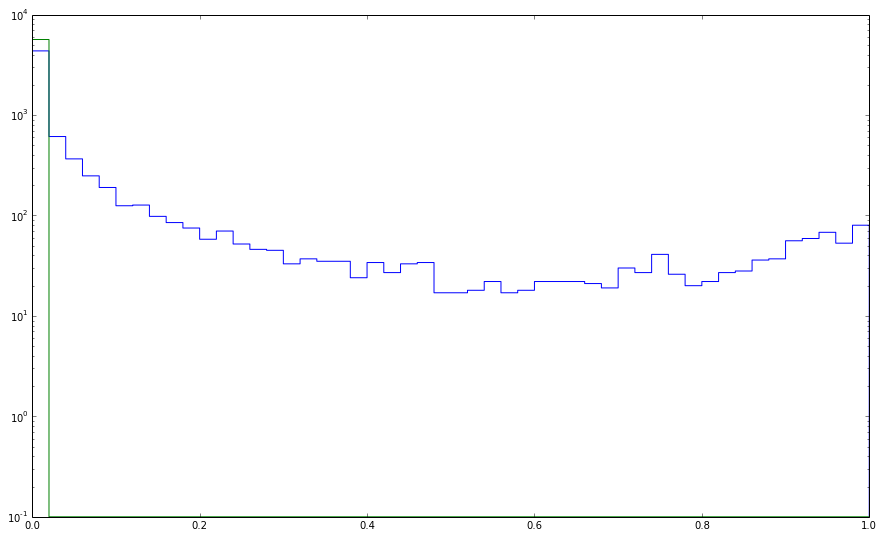

In [88]:
plt.hist(children.i.meas.blendedness.flux.value, histtype='step', log=True, bins=50, range=(0,1))
plt.hist(parents.i.meas.blendedness.flux.value, histtype='step', log=True, bins=50, range=(0,1))

In [98]:
def delta(cat):
    base = cat.i.meas.blendedness.shape
    d1c = (base.child.xx - base.child.yy) / (base.child.xx + base.child.yy)
    d1p =  (base.parent.xx - base.parent.yy) / (base.parent.xx + base.parent.yy)
    d2c = 2*base.child.xy / (base.child.xx + base.child.yy)
    d2p = 2*base.parent.xy / (base.parent.xx + base.parent.yy)
    return (((d1c-d1p)**2 + (d2c-d2p)**2)/(d1c**2 + d2c**2))**0.5

(0.0, 1.0)

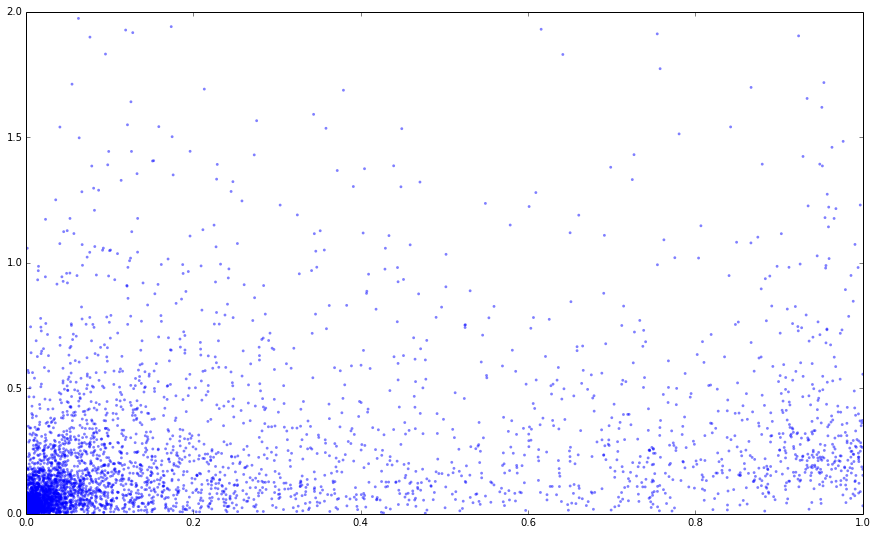

In [103]:
plt.scatter(children.i.meas.blendedness.flux, delta(children), s=8, alpha=0.5, linewidth=0)
plt.ylim(0.0, 2.0)
plt.xlim(0.0, 1.0)

In [97]:
children.i.meas.blendedness.flux.value.max()

1.0